Request for John

In [1]:
import geopandas as gpd
from dem_stitcher.geojson_io import read_geojson_gzip
from tqdm import tqdm
import pandas as pd
import asf_search as asf
import datetime
import matplotlib.pyplot as plt

In [2]:
IND = 0

In [3]:
TILES = ['14TMT', '10TFN', '10TFP']
TILE = TILES[IND]

In [4]:
df_mgrs = read_geojson_gzip('s2_mgrs_grid.geojson.gzip')
df_mgrs.head()

,geometry,type,identifier
0,"MULTIPOLYGON Z (((180.00000 -73.05974 0.00000,...",S2,01CCV
1,"MULTIPOLYGON Z (((180.00000 -83.80855 0.00000,...",S2,01CDH
2,"MULTIPOLYGON Z (((180.00000 -82.91344 0.00000,...",S2,01CDJ
3,"MULTIPOLYGON Z (((180.00000 -82.01866 0.00000,...",S2,01CDK
4,"MULTIPOLYGON Z (((180.00000 -81.12317 0.00000,...",S2,01CDL


In [5]:
df_mgrs_john = df_mgrs[df_mgrs.identifier.isin(TILES)].reset_index(drop=True)
df_mgrs_john.geometry = df_mgrs_john.geometry.buffer(1e-7)
df_mgrs_john

/var/folders/0p/d5x2m4tx5kg1246bplsvyfyh0000gq/T/ipykernel_71154/2774271749.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_mgrs_john.geometry = df_mgrs_john.geometry.buffer(1e-7)


,geometry,type,identifier
0,"POLYGON ((-121.76619 43.34620, -121.76619 43.3...",S2,10TFN
1,"POLYGON ((-121.74752 44.24655, -121.74752 44.2...",S2,10TFP
2,"POLYGON ((-100.33713 47.84591, -100.33713 47.8...",S2,14TMT


In [6]:
geo = df_mgrs_john.geometry[IND]

In [7]:
START_TIME = datetime.datetime(2022, 1, 1)
STOP_TIME = datetime.datetime(2024, 1, 1)

scenes = asf.geo_search(platform=[asf.PLATFORM.SENTINEL1],
        intersectsWith=geo.wkt,
        beamMode=[asf.BEAMMODE.IW],
        processingLevel=[asf.PRODUCT_TYPE.SLC],
        start=START_TIME,
        end=STOP_TIME,
    )

df = gpd.GeoDataFrame.from_features(scenes.geojson(), crs='EPSG:4326')
df['startTime'] =  pd.to_datetime(df['startTime'])
df['date_str'] = df['startTime'].dt.date.map(str)
df.head()

,geometry,centerLat,centerLon,stopTime,fileID,flightDirection,pathNumber,processingLevel,url,startTime,...,granuleType,orbit,polarization,processingDate,sensor,groupID,pgeVersion,fileName,beamModeType,date_str
0,"POLYGON ((-123.40879 44.08286, -122.97357 42.4...",43.4836,-121.6243,2023-12-27T02:01:52.692Z,S1A_IW_SLC__1SDV_20231227T020125_20231227T0201...,ASCENDING,137,SLC,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,2023-12-27 02:01:25.719000+00:00,...,SENTINEL_1A_FRAME,51834,VV+VH,2023-12-27T02:01:25.719Z,C-SAR,S1A_IWDV_0137_0144_051834_137,003.71,S1A_IW_SLC__1SDV_20231227T020125_20231227T0201...,IW,2023-12-27
1,"POLYGON ((-123.00367 42.59434, -122.56562 40.9...",41.9652,-121.2574,2023-12-27T02:01:27.869Z,S1A_IW_SLC__1SDV_20231227T020059_20231227T0201...,ASCENDING,137,SLC,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,2023-12-27 02:00:59.940000+00:00,...,SENTINEL_1A_FRAME,51834,VV+VH,2023-12-27T02:00:59.940Z,C-SAR,S1A_IWDV_0133_0138_051834_137,003.71,S1A_IW_SLC__1SDV_20231227T020059_20231227T0201...,IW,2023-12-27
2,"POLYGON ((-120.88487 40.91771, -120.46200 42.5...",41.9337,-122.1805,2023-12-25T14:15:44.851Z,S1A_IW_SLC__1SDV_20231225T141517_20231225T1415...,DESCENDING,115,SLC,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,2023-12-25 14:15:17.891000+00:00,...,SENTINEL_1A_FRAME,51812,VV+VH,2023-12-25T14:15:17.891Z,C-SAR,S1A_IWDV_0452_0458_051812_115,003.71,S1A_IW_SLC__1SDV_20231225T141517_20231225T1415...,IW,2023-12-25
3,"POLYGON ((-120.48646 42.40660, -120.05150 44.0...",43.4229,-121.8157,2023-12-25T14:15:20.027Z,S1A_IW_SLC__1SDV_20231225T141453_20231225T1415...,DESCENDING,115,SLC,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,2023-12-25 14:14:53.064000+00:00,...,SENTINEL_1A_FRAME,51812,VV+VH,2023-12-25T14:14:53.064Z,C-SAR,S1A_IWDV_0447_0453_051812_115,003.71,S1A_IW_SLC__1SDV_20231225T141453_20231225T1415...,IW,2023-12-25
4,"POLYGON ((-121.43200 44.36964, -120.99439 42.7...",43.7685,-119.6569,2023-12-22T01:53:43.919Z,S1A_IW_SLC__1SDV_20231222T015316_20231222T0153...,ASCENDING,64,SLC,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,2023-12-22 01:53:16.954000+00:00,...,SENTINEL_1A_FRAME,51761,VV+VH,2023-12-22T01:53:16.954Z,C-SAR,S1A_IWDV_0138_0145_051761_064,003.71,S1A_IW_SLC__1SDV_20231222T015316_20231222T0153...,IW,2023-12-22


In [10]:
df_d = df.dissolve(by=['date_str', 'pathNumber'], as_index=False)
df_d.shape

(234, 26)

In [11]:
df_d.head()

,date_str,pathNumber,geometry,centerLat,centerLon,stopTime,fileID,flightDirection,processingLevel,url,...,frameNumber,granuleType,orbit,polarization,processingDate,sensor,groupID,pgeVersion,fileName,beamModeType
0,2022-01-01,64,"POLYGON ((-117.95888 43.27210, -117.60165 41.5...",43.4650,-119.5922,2022-01-01T01:53:22.947Z,S1A_IW_SLC__1SDV_20220101T015306_20220101T0153...,ASCENDING,SLC,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,...,139,SENTINEL_1A_FRAME,41261,VV+VH,2022-01-01T01:53:06.048Z,C-SAR,S1A_IWDV_0138_0142_041261_064,003.40,S1A_IW_SLC__1SDV_20220101T015306_20220101T0153...,IW
1,2022-01-04,115,"POLYGON ((-120.83013 41.08241, -123.81907 41.4...",42.0983,-122.1284,2022-01-04T14:15:30.944Z,S1A_IW_SLC__1SDV_20220104T141503_20220104T1415...,DESCENDING,SLC,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,...,452,SENTINEL_1A_FRAME,41312,VV+VH,2022-01-04T14:15:03.989Z,C-SAR,S1A_IWDV_0451_0458_041312_115,003.40,S1A_IW_SLC__1SDV_20220104T141503_20220104T1415...,IW
2,2022-01-06,137,"POLYGON ((-119.95312 42.98501, -119.59707 41.3...",43.3426,-121.6247,2022-01-06T02:01:37.099Z,S1A_IW_SLC__1SDV_20220106T020114_20220106T0201...,ASCENDING,SLC,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,...,138,SENTINEL_1A_FRAME,41334,VV+VH,2022-01-06T02:01:14.687Z,C-SAR,S1A_IWDV_0137_0142_041334_137,003.40,S1A_IW_SLC__1SDV_20220106T020114_20220106T0201...,IW
3,2022-01-11,42,"POLYGON ((-118.77248 41.12789, -121.75790 41.5...",42.1716,-120.0623,2022-01-11T14:07:16.385Z,S1A_IW_SLC__1SDV_20220111T140648_20220111T1407...,DESCENDING,SLC,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,...,452,SENTINEL_1A_FRAME,41414,VV+VH,2022-01-11T14:06:48.485Z,C-SAR,S1A_IWDV_0451_0458_041414_042,003.40,S1A_IW_SLC__1SDV_20220111T140648_20220111T1407...,IW
4,2022-01-13,64,"POLYGON ((-117.96034 43.27184, -117.60307 41.5...",43.4647,-119.5936,2022-01-13T01:53:22.575Z,S1A_IW_SLC__1SDV_20220113T015305_20220113T0153...,ASCENDING,SLC,https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_...,...,139,SENTINEL_1A_FRAME,41436,VV+VH,2022-01-13T01:53:05.676Z,C-SAR,S1A_IWDV_0138_0142_041436_064,003.40,S1A_IW_SLC__1SDV_20220113T015305_20220113T0153...,IW


In [12]:
int_geo = df_d.geometry.intersection(geo)
perc_overlap = int_geo.area / geo.area
(perc_overlap > .99).sum()

/var/folders/0p/d5x2m4tx5kg1246bplsvyfyh0000gq/T/ipykernel_71154/1958661502.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  perc_overlap = int_geo.area / geo.area


117

In [13]:
admissible_dates = df_d[perc_overlap > .99].date_str.tolist()
admissible_tracks = df_d[perc_overlap > .99].pathNumber.tolist()

In [15]:
df_f = df[df.date_str.isin(admissible_dates) & df.pathNumber.isin(admissible_tracks)]
df_f.shape

(234, 26)

<Axes: >

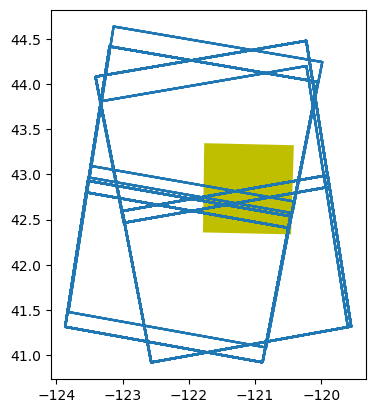

In [16]:
fig, ax = plt.subplots()
df_f.exterior.plot(ax=ax)
df_mgrs_john.iloc[:1].plot(ax=ax, color='y')

# Automate

In [18]:
START_TIME = datetime.datetime(2022, 1, 1)
STOP_TIME = datetime.datetime(2024, 1, 1)

def get_df(tile: str) -> gpd.GeoDataFrame:
    geo = df_mgrs_john[df_mgrs_john.identifier == tile].geometry.tolist()[0]
    scenes = asf.geo_search(platform=[asf.PLATFORM.SENTINEL1],
            intersectsWith=geo.wkt,
            beamMode=[asf.BEAMMODE.IW],
            processingLevel=[asf.PRODUCT_TYPE.SLC],
            start=START_TIME,
            end=STOP_TIME,
        )
    
    df = gpd.GeoDataFrame.from_features(scenes.geojson(), crs='EPSG:4326')
    df['startTime'] =  pd.to_datetime(df['startTime'])
    df['date_str'] = df['startTime'].dt.date.map(str)
    
    df_d = df.dissolve(by=['date_str', 'pathNumber'], as_index=False)

    int_geo = df_d.geometry.intersection(geo)
    perc_overlap = int_geo.area / geo.area

    admissible_dates = df_d[perc_overlap > .99].date_str.tolist()
    admissible_tracks = df_d[perc_overlap > .99].pathNumber.tolist()

    df_f = df[df.date_str.isin(admissible_dates) & df.pathNumber.isin(admissible_tracks)]
    df_f['mgrs_tile_id'] = tile
    return df_f



In [19]:
dfs = list(map(get_df, tqdm(TILES)))
df_all = pd.concat(dfs, axis=0)

  0%|                         | 0/3 [00:00<?, ?it/s]/var/folders/0p/d5x2m4tx5kg1246bplsvyfyh0000gq/T/ipykernel_71154/2460468613.py:21: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  perc_overlap = int_geo.area / geo.area
/Users/cmarshak/miniforge3/envs/dswx_val/lib/python3.12/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
 33%|█████▋           | 1/3 [00:04<00:09,  4.55s/it]/var/folders/0p/d5x2m4tx5kg1246bplsvyfyh0000gq/T/ipykernel_71154/2460468613.py:21: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorre

In [20]:
df_all = df_all.drop_duplicates(subset='fileID')

In [21]:
df_all.to_csv('jwjones_request.csv')

In [22]:
df_all.shape

(455, 27)

In [23]:
df_all.pathNumber.unique()

array([ 85, 137, 115])

<Axes: >

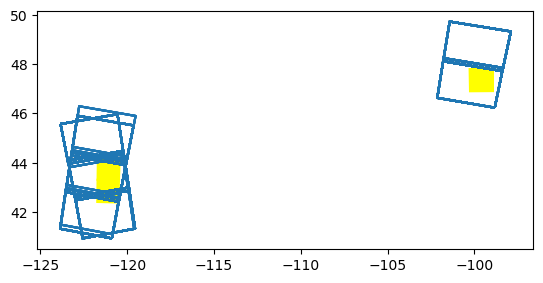

In [24]:
fig, ax = plt.subplots()
df_all.exterior.plot(ax=ax)
df_mgrs_john.plot(ax=ax, color='yellow')

In [27]:
len(df_all.startTime.dt.date.unique())

173

In [33]:
len(list(set([str(d) for d in df_all.startTime.dt.date])))

173

In [40]:
l = df_all.startTime.dt.date.unique().tolist()
sorted(l)

[datetime.date(2022, 1, 4),
 datetime.date(2022, 1, 6),
 datetime.date(2022, 1, 16),
 datetime.date(2022, 1, 18),
 datetime.date(2022, 1, 28),
 datetime.date(2022, 1, 30),
 datetime.date(2022, 2, 9),
 datetime.date(2022, 2, 11),
 datetime.date(2022, 2, 21),
 datetime.date(2022, 2, 23),
 datetime.date(2022, 3, 3),
 datetime.date(2022, 3, 5),
 datetime.date(2022, 3, 7),
 datetime.date(2022, 3, 15),
 datetime.date(2022, 3, 17),
 datetime.date(2022, 3, 19),
 datetime.date(2022, 3, 27),
 datetime.date(2022, 3, 29),
 datetime.date(2022, 3, 31),
 datetime.date(2022, 4, 8),
 datetime.date(2022, 4, 10),
 datetime.date(2022, 4, 12),
 datetime.date(2022, 4, 20),
 datetime.date(2022, 4, 22),
 datetime.date(2022, 4, 24),
 datetime.date(2022, 5, 2),
 datetime.date(2022, 5, 4),
 datetime.date(2022, 5, 6),
 datetime.date(2022, 5, 14),
 datetime.date(2022, 5, 16),
 datetime.date(2022, 5, 18),
 datetime.date(2022, 5, 26),
 datetime.date(2022, 5, 30),
 datetime.date(2022, 6, 7),
 datetime.date(2022, 6, 9